In [1]:
import pandas as pd

In [2]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [3]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [4]:
from nltk.stem import PorterStemmer

In [5]:
from nltk.stem import WordNetLemmatizer

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from sklearn.model_selection import train_test_split

In [7]:
from keras.preprocessing.text import Tokenizer

In [8]:
from keras.preprocessing.sequence import pad_sequences

In [9]:
from keras import regularizers

In [10]:
from keras.layers import Embedding

In [12]:
from keras.layers import Dropout

In [ ]:
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import backend as K

In [ ]:
from keras.callbacks import ModelCheckpoint

In [13]:
import numpy as np

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [17]:
from sklearn.metrics import classification_report

In [18]:
from sklearn.utils.multiclass import unique_labels

In [20]:
from sklearn.metrics import plot_confusion_matrix

In [22]:
import matplotlib.pyplot as plt

In [23]:
import seaborn as sns

In [2]:
df1= pd.read_csv('C:\\Users\\ARUNIMA DAS\\Desktop\\pythonP\\Twitter_Data.csv')

In [3]:
df1

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [4]:
df1.dropna(inplace= True, how= 'any' , axis=0)
len(df1)

162969

In [ ]:
opinion=[]
for i in df1.category:
    if(i <0 ):
        opinion.append('Negative')
    elif (i > 0):
        opinion.append('Positive')
    else:
         opinion.append('Nutral')


In [ ]:
opinion

In [ ]:
df1['Opinion']= opinion

In [ ]:
df1.to_csv('training_data.csv', index= False)

In [ ]:
df1['Opinion'].value_counts().sort_index().plot.bar()

In [2]:
df2= pd.read_csv('C:\\Users\\ARUNIMA DAS\\Desktop\\pythonP\\training_data.csv')

In [4]:
df2[['clean_text','Opinion']].head(5)

,clean_text,Opinion
0,when modi promised “minimum government maximum...,Negative
1,talk all the nonsense and continue all the dra...,Nutral
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive


In [13]:
df2.clean_text[4]

'answer who among these the most powerful world leader today trump putin modi may '

In [22]:
sent_list=[]
word_list=[]
text_list= list(df2.clean_text)
for i in range(len(text_list)):
    #Sentence Tokenization
    
   # sent_list.append(sent_tokenize(text_list[i]))
    #print(sent_list[i])
   
    #word Tokenization
    
    word_list.append(word_tokenize(text_list[i]))
    #print(word_list[i])

#df2['Sentence']= sent_list
#df2['word']= word_list

In [23]:
word_list

[['when',
  'modi',
  'promised',
  '“',
  'minimum',
  'government',
  'maximum',
  'governance',
  '”',
  'expected',
  'him',
  'begin',
  'the',
  'difficult',
  'job',
  'reforming',
  'the',
  'state',
  'why',
  'does',
  'take',
  'years',
  'get',
  'justice',
  'state',
  'should',
  'and',
  'not',
  'business',
  'and',
  'should',
  'exit',
  'psus',
  'and',
  'temples'],
 ['talk',
  'all',
  'the',
  'nonsense',
  'and',
  'continue',
  'all',
  'the',
  'drama',
  'will',
  'vote',
  'for',
  'modi'],
 ['what',
  'did',
  'just',
  'say',
  'vote',
  'for',
  'modi',
  'welcome',
  'bjp',
  'told',
  'you',
  'rahul',
  'the',
  'main',
  'campaigner',
  'for',
  'modi',
  'think',
  'modi',
  'should',
  'just',
  'relax'],
 ['asking',
  'his',
  'supporters',
  'prefix',
  'chowkidar',
  'their',
  'names',
  'modi',
  'did',
  'great',
  'service',
  'now',
  'there',
  'confusion',
  'what',
  'read',
  'what',
  'not',
  'now',
  'crustal',
  'clear',
  'what',
  '

In [17]:
word_list= list(df2.word)

In [21]:
for i in range(len(word_list)):
    word_list[i]= word_list[i].split(',')

In [28]:

for i in range(len(word_list)):
    for words in word_list[i]:
        #print(words)
        if words in ENGLISH_STOP_WORDS:
            print(words)
            word_list[i].remove(words)
            #print(word_list[i])

In [85]:
len(word_list)

162969

In [29]:
for i in range(len(word_list)):
    for words in word_list[i]:
        if(len(words)==1 or words.isdigit()):
            print(words)
            word_list[i].remove(words)
            #print(word_list[i])

“
”
’
’
2019
2019
2019
’
’
’
2019
2014
–
’
474
’
100
‘
’
’
’
’
’
3040
2025
’
’
₹
100
‘
’
2014
2010
’
’
’
➡
’
’
’
2019
ा
’
2025
@
“
”
‘
’
’
’
’
’
’
’
2019
ा
ी
ै
’
2025
2019
…
100
’
’
’
2004
2017
159
2013
111
118
122
133
140
’
2014
’
’
’
’
’
140
❤
’
’
370
’
’
2019
2019
’
2025
’
@
‘
’
2016
2019
300
1015
…
…
2019
201516
1000
2014
2019
‘
2002
‘
’
2014
20192024
2014
’
2015
2019
’
“
”
2019
2014
’
’
@
’
’
2019
2019
2025
’
’
’
’
’
’
‘
’
’
’
’
’
’
2014
’
2017
2025
2000
4000
2611
⁦
⁦
⁦
2022
5001000
’
2019
1000
’
’
’
336
2019
2019
’
’
’
‘
’
‘
’
’
2014
2014
2019
100
100
…
…
ी
‘
’
2013
2013
’
’
‘
’
⁦
⁦
10000
2014
510
’
2019
2019
2002
2019
2011
2019
2017
250
350
2000
’
2019
2019
700
’
’
2019
‘
’
2019
910
₹
1000
2014
“
”
2014
“
”
2025
100
’
‘
’
’
’
2013
1965
1999
’
’
2024
2017
2019
2019
@
2024
4300
’
2008
850
2002
’
’
’
2019
100
’
’
2002
2014
2019
200708
2014
’
’
2000
2017
2000
126360
1984
‘
’
‘
’
136
“
”
2019
’
2002
2019
“
”
”
’
’
’
“
’
”
्
्
2022
2019
2014
2000
’
्
ो
ी
2024
…
’
’
’
300
2019
2019
“
”

100
1517
“
े
े
”
’
2014
2013
“
”
’
“
े
े
”
“
”
2019
2019
2019
2024
’
’
’
’
–
–
350000
‘
’
1600
100
‘
’
’
—
’
ी
’
2014
2002
2024
2014
2014
2024
’
2007
2014
6000
3000
100
100
150
200
500
2014
230240
280290
270280
290300
320330
360370
350
380390
2014
2019
2014
2024
2024
125
12000
₹
“
”
2007
2014
’
2024
’
’
”
’
000
’
’
2012
6000
’
’
’
’
…
’
2014
’
“
”
12000
’
’
“
”
2014
2019
’
’
219
’
410
2024
2014
☺
75000
’
2014
’
“
“
@
’
2018
…
…
…
…
6000
️
20172018
’
300
’
2019
2019
6000
6000
’
ी
ॉ
े
े
ो
ा
े
‘
’
’
’
2019
2024
’
2011
2014
1968
2014
2019
2014
2024
’
6000
72000
2014
’
×
’
“
‘
’
’
”
’
’
2014
’
’
100
’
’
’
2013
2014
’
2014
2014
’
’
108
2014
2002
72000
’
’
“
”
“
”
’
’
1600
500
250319
’
’
’
’
’
350000
1520
2019
6000
’
2019
1971
’
500
12000
’
72000
2014
000
⁦
⁦
’
’
2019
’
1400
2014
9000
5000
7000
’
’
6000
ु
े
ी
े
।
2014
2014
’
‘
’
ಂ
’
72000
2014
2014
2014
2019
24319
2014
2019
’
’
“
”
72000
‘
’
64480
7200
3040
’
“
”
’
2013
“
’
’
”
’
72000
500
’
’
’
’
2009
2013
6000
475
2017
100
2020
‘
‘
’
2019
‘

2014
12000
72000
6000
126
10000
4000
500
9435228232
2014
’
2019
30000
’
2024
370
@
2014
2014
2019
’
2014
104
’
201415
2008
140
2019
125
4900
103
2013
2019
“
”
’
’
2014
’
’
2016
’
’
“
”
177
2018
6000
10000
2019
’
72000
2019
72000
’
2019
100
12000
144000
72000
2014
510
201516
2019
2009
’
’
’
13000
2019
6000
“
“
’
72000
“
”
‘
’
“
”
2014
180
@
@
’
’
2019
2014
’
2008
’
2019
’
’
1000
2014
…
54242500
“
”
’
1012
2014
2005
’
20192024
“
“
125
‘
’
2019
’
’
’
’
6000
2002
@
’
“
”
’
’
2014
1500
’
’
’
2014
’
2004
6000
12000
1962
’
100
’
’
’
2014
’
’
’
“
”
2014
“
”
‘
’
500
“
”
100
’
’
’
2024
’
’
“
”
10000
10000
3500
30000
375000
2019
68000
–
1991
—
–
350000
’
’
12000
’
2014
72000
28000
5000
…
72000
2019
100
125
“
”
’
’
“
”
’
’
26032019
0700
2019
12000
’
’
’
715
2018
247
100
12000
ा
’
⚡
115
316
“
”
ा
6000
“
”
72000
“
”
’
2019
2014
2019
’
⭕
4300
2019
20000
2014
2019
72000
’
72000
’
688863
2014
’
’
500
100
’
6000
’
’
“
’
”
2014
2019
’
’
’
’
“
”
”
@
’
1000
“
”
“
6000
20000
2019
2019
2014
’
’
2019
“
”
130


2014
“
”
’
’
’
‘
’
2019
2024
380
’
’
’
’
’
12000
72000
ॉ
10000
130
12000
2224
“
’
”
’
2013
’
“
”
’
’
‘
’
“
”
’
2019
‘
’
100
2029
2024
100
’
201819
100
2019
’
2019
’
2002
2002
✌
’
10000
2019
19982004
2011
201114
’
’
’
100
’
’
100
2014
’
’
“
”
”
20172018
100
2014
12628
100
120
“
”
2014
–
‘
’
‘
’
–
’
’
‘
’
2014
2019
2019
503908
472300
138587
350000
350000
2014
333
300
2019
’
426
’
2014
2014
201516
2019
ी
“
’
”
“
12000
’
”
2014
’
450
50000
2029
’
–
₹
’
’
‘
’
‘
’
189
2019
200
’
’
…
2014
2019
’
’
’
’
“
”
’
2014
2611
‘
’
‘
’
510
└
└
’
’
1994
’
’
ी
270
100
2014
’
135
435
“
’
’
’
‘
’
2019
100
00905523223324
’
”
“
“
365
’
201516
426
1971
’
’
’
’
’
’
2019
“
“
’
’
ो
ा
।
’
’
2019
’
’
2014
2015
2016
2017
2018
2014
2016
2018
72000
2019
‘
’
’
100
’
‘
’
’
’
’
“
”
189
’
…
426
’
189
2016
’
’
2024
’
’
2019
1991
’
’
‘
’
’
’
’
4000
132
’
’
”
100
2025
’
2019
201516
201516
—
“
”
“
’
”
⚡
2014
1097
2019
‘
’
2007
100
128
’
2014
200
‘
’
‘
’
‘
’
2014
‘
’
“
”
’
’
’
’
’
’
‘
’
2017
360
6000
’
’
’
’
2014
’
’
‘
’
’
@
–

े
‘
’
’
2014
’
‘
’
2001
’
’
’
’
’
’
’
111
’
’
’
100
’
’
’
’
2019
’
’
’
8020
’
100
2013
400
2014
2019
“
”
2002
2014
8020
’
’
’
’
300
’
72000
2012
’
72000
’
’
’
’
’
’
’
’
’
12000
7000
5000
6000
2019
3000
’
’
’
1925
’
2019
’
‘
1947
’
2014
2019
2019
’
100
⚡
111
“
2002
”
’
’
“
’
”
2019
“
201819
2019
’
2014
2019
’
–
1983
2001
27319
’
’
2019
’
2014
72000
ी
े
’
“
”
’
‘
’
2000
6000
2019
2019
’
’
’
’
2004
’
’
‘
’
‘
—
’
6000
2019
—
19618
’
’
’
‘
’
’
“
’
20172018
2014
2019
2004
350
2019
500
500
’
“
”
’
322
354
’
’
2019
400
’
“
”
272
⁦
’
ी
1962
25122014
20092014
500
2014
’
’
’
े
ा
‘
’
2019
1992
’
’
‘
’
600
2019
’
‘
’
’
’
’
130
’
’
’
2004
’
2014
2014
2014
’
’
“
”
’
’
’
100
’
’
’
72000
’
’
”
2013
’
’
‘
’
’
”
’
72000
200
1500000
’
’
’
’
100
2014
2019
“
’
’
’
2019
100
’
’
’
100
2019
1971
“
”
’
’
’
’
’
’
100
’
’
1994
3000
1984
1947
2004
’
72000
200414
’
‘
’
’
”
‘
’
►
1994
“
”
”
5484
2019
2014
’
’
’
’
’
’
’
”
2018
2014
’
8090
6000
2019
2002
2014
6000
2019
210
200914
’
6000
250
“
350
220
“
”
150
120
2014


”
“
”
130
2012
2014
100
100
2012
2015
35000
14000
‘
’
‘
’
’
’
2014
2012
2019
’
2019
’
200
’
2019
2012
’
156
➿
…
1999
2024
’
’
2011
2019
200
1687
1796
1856
2000
’
’
’
’
’
’
2014
’
’
363
2012
2012
’
‘
’
’
370
“
“
100
363
’
2014
2010
130
⚡
2012
2014
2019
2012
300
2014
2010
ी
2019
‘
’
526
’
280
247
’
2019
’
1971
’
’
2012
2014
2018
’
”
“
”
2014
’
‘
’
2018
2019
’
’
185
2014
“
”
‘
’
2012
’
’
’
’
’
’
2014
’
’
2012
‘
’
100
’
1974
’
’
2000
6000
5484
’
’
2014
’
2019
’
’
”
…
…
2019
1964
19472019
2014
2012
’
’
2019
2703
2703
2703
’
2012
’
“
…
2012
’
’
1962
2012
2014
–
9887733000
✌
231
2703
2703
548
–
2012
’
“
”
2014
1996
“
”
ा
ा
े
72000
’
’
’
✌
1998
’
’
2014
’
’
’
”
1000
⚡
2703
2703
130
130
’
‘
’
•
•
•
130
’
2012
2007
2019
20192024
350
…
2012
•
•
े
ै
’
200
2703
2703
’
‘
’
‘
’
“
”
“
”
’
•
“
”
•
’
2018
2019
2009
•
•
“
”
”
’
2014
@
2012
2019
’
1000
2012
‘
’
600
’
ா
2014
2007
2012
’
2014
•
…
2014
2012
❤
2004
300
‘
’
2014
’
‘
’
2018
2019
2007
‘
’
‘
2019
‘
’
1998
2019
440113740
2011
⁦
⁦
’
2019
2014
2012


–
1153826
201920
’
’
’
’
’
“
2019
2019
’
’
’
’
’
’
’
“
“
2013
2018
2019
’
’
130
’
’
’
2019
’
’
2012
“
“
”
’
2012
“
”
’
‘
2012
2014
2019
1938
2259790667
2012
993
’
30000
’
’
2019
2011
2019
2012
201112
’
2019
2000
’
1962
2019
247
2019
’
’
“
”
’
2012
’
2019
’
’
’
’
ि
2018
400
300
2019
2012
’
‘
’
2011
1950
2012
’
’
’
1955
4119
’
’
1000
2007
2002
“
”
2019
2004
“
”
130
“
”
’
’
’
’
‘
’
’
2019
’
430
“
”
2014
2014
’
2013
2019
2019
్
2019
2011
2012
2011
400
“
’
”
2013
2024
2019
’
–
–
’
2012
@
’
’
2018
2019
‘
’
’
300
’
‘
’
’
’
’
’
2014
’
2012
⁦
2013
’
2012
’
’
1958
2014
2019
’
’
‘
’
’
2022
’
’
’
’
’
’
2019
20142016
’
2014
2019
“
”
’
2014
’
’
2019
’
2012
’
1969
1962
’
2012
2014
’
’
’
₹
‘
2012
’
“
“
“
’
“
1145
201112
510
2007
’
”
✌
’
’
2014
’
’
“
”
2018
…
…
…
…
’
2024
’
’
ी
ो
ो
ी
ा
ी
2017
’
’
2611
’
“
”
2018
2014
“
201213
201415
’
1030
1130
े
ी
ं
ा
2010
’
2002
2011
’
’
’
2014
2014
’
72000
’
’
’
201314
201213
2011
’
’
9999
“
”
1969
1962
2014
72000
’
’
2019
’
2010
2012
’
20122013
ो
ी
2012
2019
⚡
’
⁦


’
2014
1857
2012
’
’
’
’
’
2012
₹
2011
’
2019
ो
2005
2014
1928
1983
2012
2018
1958
1962
“
”
2014
125
434
431
’
❤
1857
’
’
’
’
2012
2000
’
2019
2014
2014
2012
7697601940
‘
’
’
2012
—
’
6000
’
’
2024
•
•
’
“
”
“
”
’
”
2012
—
•
•
“
”
•
“
2009
2009
✅
’
300
2019
“
”
“
”
’
2021
2014
2014
’
2014
2012
2012
1975
’
’
’
100
’
300000
’
‘
’
‘
’
2012
’
’
1527
2019
2012
2014
2019
2005
’
2019
2019
8020
’
’
104
2017
’
“
’
’
ା
’
—
400
2019
2019
’
“
”
200
‍
1975
404
–
’
20172
1984
2002
1984
370
’
’
1154
2019
3030
2014
100
126
♂
100
72000
2019
2012
201213
201415
2014
’
’
’
2019
’
’
100
2019
’
2011
2018
⁦
2014
’
’
‘
’
108
2005
2014
60000
’
’
’
’
’
2024
“
”
“
”
“
’
”
’
‘
’
2611
’
’
2002
201415
100
2012
2019
’
150
“
”
2014
2018
80000
2014
114512
’
“
”
“
”
399
117
399
’
2019
2012
’
400
300
’
’
2019
’
2002
2014
►
’
’
2002
’
2002
72000
12000
159
2019
’
2019
’
’
72000
’
2019
2019
5001000
’
’
2012
2014
2014
2019
’
’
201112
’
2019
100
’
2012
’
☹
’
’
’
’
’
’
’
’
’
2611
’
’
150
’
’
29000
⁦
’
’
2018
2012
8020
’
’
’
2

’
@
300
—
3500
100
’
1947
1952
1962
1971
1984
2004
2014
’
’
2019
…
60000000
’
☺
’
‘
’
‘
’
’
’
✌
’
’
6000
’
’
2019
’
₹
’
2019
2014
801
711
225
’
340
’
’
❓
100
“
”
’
2017
2019
2011
2019
2019
“
”
’
ে
ে
–
’
’
‘
’
’
2012
4000
9000
…
“
”
’
’
’
’
’
—
—
’
1012
‘
’
’
450
’
2019
‘
’
6000
’
’
—
–
–
–
–
2019
320
546
250
’
2019
@
@
28032019
28032019
’
’
█
\
’
’
2019
’
’
’
…
1000
2019
2014
2019
2014
72000
“
”
2002
2018
201314
2019
☕
2014
’
11538
201819
200910
4163
2019
1984
2002
2019
’
—
2012
’
2011
2019
’
100
’
350
’
2018
27000
“
”
”
ी
ा
’
’
’
2014
‘
’
2019
’
2019
540
•
’
’
’
’
’
’
’
’
—
200714
100
’
’
“
2014
2019
2019
’
’
’
370
2006
2002
“
”
2019
’
’
—
⁦
2017
’
7075
100
‘
’
1971
1971
2029
’
’
2019
2014
@
30000
2019
2018
…
’
‘
’
2019
2009
’
2014
7200000
157200000
’
’
’
’
’
1974
1998
‘
’
100
100
’
’
’
’
’
1940
1969
2019
—
ी
100
@
2014
“
”
’
’
2611
400
‘
’
’
’
2019
“
”
2016
2014
13267
’
100
’
…
2611
’
20000
‘
’
’
‘
’
646
’
’
’
100
’
2019
े
’
“
”
130
’
ो
2019
“
”
413
101
100
2014
“
”
ा
ी
ी
❤
–
‘
’
201

’
’
2019
’
’
7200000
157200000
–
100
’
1971
2019
2019
’
‘
’
’
’
2012
’
“
”
’
’
’
“
”
’
►
’
’
’
’
’
2014
2014
“
”
“
”
े
200220
256
’
2007
ो
े
1925
’
’
₹
1971
2012
2014
2012
’
₹
’
2019
‘
’
…
’
2014
’
72000
’
460
2014
2019
’
2019
2024
282
’
’
’
2014
’
6000
’
’
—
2022
2019
2014
2019
2019
2014
2019
₹
115
100000
’
“
”
2019
342
2014
’
2014
‘
’
2014
2014
100
’
’
500
2019
111
’
25000
“
”
220
2019
‘
’
ी
ो
ो
ो
ो
ै
‘
’
2014
‘
’
’
’
7200000
157200000
’
…
2019
2014
280290
272
ा
2014
’
’
1965
1990
’
2019
’
‘
’
‘
’
’
’
2014
2014
130
’
’
’
2014
ो
्
’
‘
‘
’
‘
‘
1969
‘
’
’
’
⁦
⁦
2014
2014
’
–
100
2019
9818939293
‘
’
‘
’
2002
2019
2014
510
2014
’
2013
2014
2006
2011
2014
2019
072
1832
ा
’
173
1477
222
’
400
‘
’
‘
’
’
’
300
’
2019
’
“
”
1940
’
’
“
”
ो
2024
2019
’
’
2014
2035
2019
’
’
’
4000
2035
1967
2019
’
2014
’
’
‘
’
‘
’
2019
2029
2014
—
2026
2019
’
2019
’
2014
‘
’
001
2004
2019
1940
1964
151969
1964
’
’
2019
“
”
“
”
“
”
2012
’
’
’
’
2019
’
2010
’
’
1989
340
’
2012
2024
►
2019
2014
₹
2530
’
“
”
’
’
’
20

’
’
300
’
’
300
“
”
90000
’
’
’
’
’
2019
2014
’
“
”
’
2019
2014
’
2014
’
’
2019
’
’
200
’
100
100000
’
’
’
‘
’
’
2014
2024
⁦
2013
150
’
’
’
18452
’
3000
2014
’
2019
‘
’
100
2014
’
–
2019
2526
6000
2019
“
”
♥
’
2019
’
…
’
2014
—
ा
ि
2002
130
’
‘
’
’
’
360000000000
2009
2019
“
”
2010
2011
’
’
’
’
“
”
”
2019
’
’
’
’
–
—
’
250
’
”
’
’
’
2002
2019
‘
’
300150
’
“
”
’
2019
…
…
…
2019
2019
’
72000
2014
2019
2012
175
’
’
2019
2019
’
’
2018
2014
♨
2004
‘
’
‘
’
‘
’
2019
2014
’
’
’
’
2014
⁦
2019
ा
‘
’
2014
’
‘
’
⁦
—
☺
‘
‘
’
‘
’
1000
’
’
’
2014
2019
2019
2019
201
100
’
’
’
’
80000
2019
•
•
2019
‘
’
100000
2014
2014
“
”
3000
3000
7200000
157200000
72000
‘
’
’
’
’
–
3000
’
’
200
20122013
’
’
’
’
’
1980
29023
1980
10279
23814
28702
37531
…
2014
300
“
”
ो
’
2014
2019
—
’
2019
‘
’
2019
2019
2019
100
’
250
“
”
“
”
’
‘
’
’
’
’
2019
250
2019
‘
’
’
”
”
2019
’
’
‘
’
‘
2017
’
100
“
108
14000
9000
2019
2012
201213
201415
2019
‘
’
₹
2019
’
105
2002
‘
’
2019
’
’
’
813
14000
9000
100
100
2014
’
2014
’
“
”
’
813
’

2019
28702
37531
100
200
“
”
”
‘
’
’
2014
2014
“
”
’
235
100
2024
‘
’
️
29032019
600
7200000
157200000
❤
’
377
20022008
‘
’
‘
’
150
–
‘
’
’
2002
321
’
2019
’
100
1983
’
’
’
30000
’
’
’
ु
…
…
’
’
’
’
2020
2019
19992004
140
’
’
25000
’
“
”
700000
1961
100
’
’
❎
2002
ा
ी
’
2009
2019
7200000
157200000
2014
9000
’
’
‘
’
⁦
⁦
⁦
⁦
⁦
72000
2019
6001
6001
’
2014
2017
‘
‘
2018
2018
⁦
⁦
⁦
⁦
⁦
‘
’
”
2018
2018
2018
2013
2015
‘
2014
’
631056
720000000
18605005555
’
2014
⁦
⁦
⁦
⁦
⁦
600
2000
3000
10000
2019
’
’
14000
9000
100
20092014
’
’
’
’
…
…
…
…
…
—
100
’
’
2019
2019
“
“
’
’
‘
’
’
’
’
⁦
⁦
⁦
⁦
⁦
‘
’
‘
’
2015
…
ा
500
933
’
’
“
”
2014
’
’
’
2002
2004
2024
‘
’
‘
’
’
’
2019
’
‘
’
2018
2018
’
’
300
2019
103
2019
2014
£
’
200
’
130
’
’
’
’
‘
’
‘
’
“
”
’
100
’
’
’
’
172
’
’
’
2019
2019
3119737500
’
13000
12000
‘
’
‘
’
’
’
–
’
2012
1000000000000000
’
100
2014
1984
1971
2014
2014
’
’
’
’
’
’
’
’
’
’
’
’
’
2019
’
100
…
2029
’
’
’
‘
’
…
72000
‘
‘
’
‘
’
’
2014
380000
“
”
’
’
©
2055
2014
’
2018
2018
1030
’
…
…
…

⁦
’
’
16000
100
ी
ी
’
2014
2019
1940
1958
1968
2019
2019
3032019
“
’
’
’
’
’
ू
126
200001
126
ா
’
’
’
2013
300
100
2014
’
’
2013
2013
2019
’
’
2014
2009
’
2016
126
200001
126
’
’
’
”
@
108
“
”
“
”
“
”
100
’
’
2019
•
•
2019
2019
✨
”
✨
2020
2012
‘
’
‘
’
’
177
2018
’
’
’
000
2017
“
‘
’
”
2019
2019
2014
’
72000
’
600
ी
90008000
’
’
72000
“
”
’
’
’
’
‘
’
100
’
“
’
”
300
’
’
’
’
‘
’
‘
’
2014
100
300
’
’
’
112
“
”
“
”
’
1980
29023
1980
10279
23814
28702
37531
230
500
1000
’
“
”
2022
2017
2019
201924
6000
1991
10000
–
“
”
’
101
’
’
‘
’
’
’
’
’
’
’
’
’
⁦
“
”
⁦
’
’
2009
2007
2017
340
100
2014
2019
000
4050
1984
2002
1014928997
201415
201819
50000
500000
2019
2017
’
’
’
’
⚡
2019
“
’
”
“
”
2004
2014
600
100
⚡
“
“
“
”
“
2019
’
2009
’
’
’
’
’
2014
’
’
1985
’
’
—
’
’
’
’
2014
282
336
2019
300
’
’
’
2014
100
2014
₹
134
‘
’
316
’
’
2019
2014
…
’
100
ి
@
2019
2014
‘
’
’
’
2019
0414
1419
’
‘
’
”
’
’
500
’
1947
100
‘
’
’
300
370
2014
2018
600
400
’
2019
•
•
’
’
219
…
’
’
50000
2020
’
165
2035
1971
93000
’

100
300
2014
2014
‘
’
’
’
ो
2019
2019
1963
3000
850
2019
’
370
120
370
2002
’
’
’
1518160
1522346
‘
’
’
2019
100
3700
4000
90000
2025
’
“
”
’
’
600
’
’
’
1000000
’
125
2019
’
2019
919962380254
2019
’
2024
370
’
’
’
’
2014
2007
90000
2004
2019
’
120
’
747
2002
2019
2008
’
2019
2014
2014
2611
540
्
412
’
22766
20190330
’
‘
’
ा
’
’
’
3400
’
2024
‘
’
’
2014
173
’
247
’
’
’
2024
2019
2019
1010
2019
’
’
’
100
’
’
’
2014
₹
’
‘
’
’
’
22766
1947
’
’
“
”
2019
’
’
“
”
“
”
‘
’
’
600
’
’
2019
’
140
100
’
130
2014
2019
30000
’
’
‘
’
’
100
2014
30000
’
250
’
’
2019
“
“
“
’
”
400
’
22766
“
”
2030
’
’
‘
’
’
‘
’
’
’
2019
’
’
’
2014
30000
100
2019
100
’
”
2019
“
”
’
“
”
’
2014
2014
’
“
”
2014
’
300
’
’
₹
2014
300
’
’
‘
’
’
’
‘
’
’
’
2014
2017
1947
“
”
₹
100
125
2019
’
’
ा
ै
’
’
2019
’
134
’
100
’
2014
े
्
’
‘
’
’
250
2014
2019
’
2014
2002
2014
2002
2014
“
’
”
2019
’
100
100
2019
@
2017
—
100
’
’
’
’
’
2019
2019
‘
’
’
1975
100
’
2014
‘
’
’
’
’
’
2014
’
2013
2014
1215
2014
2014
282
300
100
250
2019
’
19727

2012
’
“
’
”
2019
⁦
”
’
2014
2014
337000
370
’
’
’
2019
4000
2014
2019
300
‘
’
’
2019
2019
2019
’
111
“
”
300
’
20192024
2019
2014
’
2014
’
’
2019
”
500
’
200
’
10585
1045
13000
40000
ी
2014
2019
1030
500
‘
2015
’
2014
2014
2019
’
2014
’
2014
2019
‘
’
‘
’
’
201935
1020
’
2012
’
’
’
500
“
”
2019
280
330
’
9000
14000
304
2013
2024
2019
500
1947
ी
2019
370
ि
ी
134
’
@
’
134
2014
300
‘
‘
’
’
’
500
100
’
1992
2019
’
‘
’
100
’
’
“
”
2019
’
500
31319
2014
’
’
’
1992
’
9000
‘
’
65000
’
’
✋
’
101
23519
3881
1179
2012
1971
⁦
370
370
2014
500
548
1179
2012
2019
’
“
”
107
’
’
’
’
110
’
’
37035
2014
2025
’
2019
1520
2014
2019
“
”
ो
ै
ा
ो
ा
’
’
2019
2015
2019
️
’
’
‘
’
500
1179
2012
2019
’
’
’
’
‘
’
’
‘
’
000000
‘
ी
’
1000
’
’
100
2019
’
@
370
’
‘
’
’
232
250
2014
2019
2014
112016
100
100
✅
’
‘
’
’
’
1000
2019
333
100
444
2019
’
2019
2014
108
2014
175
”
2014
6000
2014
2014
1947
⚡
50000
1937
‘
’
19618
@
2019
500
“
”
’
’
’
’
’
’
‘
’
’
2014
2019
1000
2019
48000
13000
‘
’
100
’
’
’
’
’
400
‘
’
’
370
720

‘
’
े
े
200
’
2014
2019
“
’
”
2014
2014
2014
2013
’
1336
106
18000
2014
‘
’
’
2019
2008
2014
’
’
100
’
’
1971
2019
ो
ि
14000
9000
2019
456
ा
2014
494
2014
‘
’
“
2014
100
”
ु
े
ै
18000
372000
542
’
’
’
72000
2014
456
2002
2019
‘
50000
2019
2014
2019
2010
’
50000
5060
‘
’
2019
@
2040
“
”
’
’
’
’
2017
2002
100
’
’
‘
’
3700
4000
2014
2002
2002
‘
’
2019
2014
2014
❤
❤
2019
⁦
े
ि
2017
’
230240
260270
⁦
500
⁦
100
2014
⁦
2014
⁦
2019
2024
2002
‘
’
⁦
2017
…
’
’
25000
25000
6500
6500
2500
81680830239254700195
‘
’
⁦
⁦
’
2000
409002010578685
2014
’
2019
’
’
’
–
2014
–
’
’
542
’
’
2019
370
’
2014
200
400
134
’
20182019
2018
108
100
ा
ा
’
2024
72000
72000
ा
456
’
2014
2014
92547001958168083023
⚘
2016
2019
2019
“
”
50000
ी
ा
400
’
’
’
’
’
2014
‘
’
’
10000
72000
2014
’
“
50000
2014
’
2014
2014
2014
2014
324
2014
400
100
ा
ो
5000
2000
‘
’
2019
2014
2014
35000
’
’
2004
2014
600
2014
2014
20000
2024
101
’
‘
’
2024
542
2014
ी
ू
’
2019
500
‘
’
’
’
’
’
‘
’
2014
420
‘
’
251215
’
0500
2019
“
”
1971
1500000
3000

“
’
’
’
“
”
”
’
”
’
1000
12000
2014
’
“
”
456
1000


In [34]:
for i in range(len(word_list)):
    
    for word in word_list[i]:
        if not word.isalpha():
            print(word)
            word_list[i].remove(word)

In [35]:
pstemmer = PorterStemmer()
lemma = WordNetLemmatizer()
for strs in word_list:
    #Stemming
    for i in range(0, len(strs)):
        strs[i]=pstemmer.stem(strs[i])
        
     #Lemmatizing
    for i in range(0,len(strs)):
        strs[i]=lemma.lemmatize(strs[i], pos='a')     

In [36]:
df2['word']= word_list

In [37]:
df2.to_csv('training_data.csv', index= False)

In [26]:
df3= pd.read_csv('C:\\Users\\ARUNIMA DAS\\Desktop\\pythonP\\training_data.csv')

# Tokenization

In [27]:
word= list(df3.word)

In [77]:
word

["['modi', 'promis', 'minimum', 'govern', 'maximum', 'govern', 'expect', 'begin', 'difficult', 'job', 'reform', 'state', 'doe', 'year', 'justic', 'state', 'busi', 'exit', 'psu', 'templ']",
 "['talk', 'nonsens', 'continu', 'drama', 'vote', 'modi']",
 "['did', 'just', 'say', 'vote', 'modi', 'welcom', 'bjp', 'told', 'rahul', 'main', 'campaign', 'modi', 'think', 'modi', 'just', 'relax']",
 "['ask', 'support', 'prefix', 'chowkidar', 'name', 'modi', 'did', 'great', 'servic', 'confus', 'read', 'crustal', 'clear', 'crass', 'filthi', 'nonsens', 'abus', 'come', 'chowkidar']",
 "['answer', 'power', 'world', 'leader', 'today', 'trump', 'putin', 'modi']",
 "['kiya', 'tho', 'refresh', 'maarkefir', 'comment', 'karo']",
 "['surat', 'women', 'perform', 'yagna', 'seek', 'divin', 'grace', 'narendra', 'modi']",
 "['come', 'cabinet', 'scholar', 'like', 'modi', 'smriti', 'hema', 'time', 'introspect']",
 "['upcom', 'elect', 'india', 'saga', 'go', 'import', 'pair', 'look', 'current', 'modi', 'lead', 'govt', '

In [42]:
vec = CountVectorizer()
X = vec.fit_transform(word)
#print(X.toarray())

In [24]:
import numpy

In [43]:
print(vec.get_feature_names())


['aa', 'aaa', 'aaaa', 'aaaaagg', 'aaaaand', 'aaaah', 'aaaahhhhhhhhhh', 'aaaand', 'aaaargh', 'aaadhar', 'aaahhh', 'aaak', 'aaall', 'aaand', 'aaao', 'aaap', 'aaapk', 'aaayen', 'aab', 'aabar', 'aabha', 'aabhass', 'aabhi', 'aabki', 'aabru', 'aach', 'aacha', 'aachar', 'aachcha', 'aache', 'aachedin', 'aacstra', 'aad', 'aadami', 'aadani', 'aadaniambani', 'aadapaada', 'aadar', 'aadarniya', 'aadarsh', 'aadat', 'aadath', 'aaddar', 'aadesh', 'aadha', 'aadhaar', 'aadhaaren', 'aadhaargstmnregaetc', 'aadhaarjan', 'aadhaarshar', 'aadhar', 'aadharaadhar', 'aadharand', 'aadharathoda', 'aadhardirect', 'aadharevm', 'aadheadhur', 'aadi', 'aadil', 'aaditya', 'aadivasi', 'aadmi', 'aadmih', 'aadr', 'aadvani', 'aae', 'aaega', 'aaeng', 'aafat', 'aag', 'aaga', 'aagain', 'aagainest', 'aagallabanglor', 'aagar', 'aagathu', 'aagay', 'aagaya', 'aagayi', 'aagey', 'aagi', 'aagr', 'aagudr', 'aagy', 'aagya', 'aagyaa', 'aah', 'aahh', 'aai', 'aaila', 'aaina', 'aainst', 'aais', 'aaisa', 'aaiy', 'aaiyaar', 'aaj', 'aaja', 'a

In [44]:
print(vec.vocabulary_)

{'modi': 45870, 'promis': 57672, 'minimum': 45220, 'govern': 27744, 'maximum': 44159, 'expect': 23260, 'begin': 7222, 'difficult': 19301, 'job': 36537, 'reform': 60379, 'state': 68631, 'doe': 20057, 'year': 80215, 'justic': 37073, 'busi': 10666, 'exit': 23222, 'psu': 58118, 'templ': 71469, 'talk': 70782, 'nonsens': 50526, 'continu': 15397, 'drama': 20533, 'vote': 77657, 'did': 19207, 'just': 37068, 'say': 63740, 'welcom': 78595, 'bjp': 8913, 'told': 73496, 'rahul': 59070, 'main': 42839, 'campaign': 11023, 'think': 72533, 'relax': 60577, 'ask': 4553, 'support': 69911, 'prefix': 57033, 'chowkidar': 13366, 'name': 48623, 'great': 28211, 'servic': 65040, 'confus': 14847, 'read': 60005, 'crustal': 16583, 'clear': 13895, 'crass': 16192, 'filthi': 24641, 'abus': 585, 'come': 14344, 'answer': 3280, 'power': 56623, 'world': 79648, 'leader': 40439, 'today': 73357, 'trump': 74230, 'putin': 58487, 'kiya': 39055, 'tho': 72713, 'refresh': 60390, 'maarkefir': 42294, 'comment': 14431, 'karo': 37828, '

In [45]:
print(len(vec.get_feature_names()))

81286


In [28]:
max_words= 10000
max_len= 50
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(word)
sequences = tokenizer.texts_to_sequences(word)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ... 2847 2474 1006]
 [   0    0    0 ...  647    8    1]
 [   0    0    0 ...    1   19 2407]
 ...
 [   0    0    0 ... 1074 3972  309]
 [   0    0    0 ...  281   82  458]
 [   0    0    0 ...  273  285  114]]


In [22]:
tweets.shape

(162969, 50)

In [29]:
embedding_layer = Embedding(10000, 128)


In [30]:
embedding_layer

In [31]:
y= list(df3.category)
#y= np.array(y)
for i in range(len(y)):
    if(y[i]==-1):
        y[i]= [1,0,0]
    elif(y[i]==0):
        y[i]= [0,1,0]
    else:
        y[i]= [0,0,1]
#z = np.array([[1,0,0] if i == -1  else [0,0,1] for i in y])

In [32]:

y= np.array(y)

In [33]:
y.shape

(162969, 3)

In [34]:
Xtrain, Xtest, ytrain, ytest = train_test_split(tweets, y, shuffle = True, train_size = 0.8)


In [35]:
Xtest

array([[   0,    0,    0, ..., 1442,   95,  510],
       [   0,    0,    0, ...,    8, 2052,    3],
       [   0,    0,    0, ...,  250,   85,  560],
       ...,
       [   0,    0,    0, ...,    2,   63,   80],
       [   0,    0,    0, ...,  690,  135, 4421],
       [   0,    0,    0, ...,   29,  486, 8996]])

In [36]:
ytest.shape

(32594, 3)

In [37]:
y_test= list(ytest)

# Creating Model

In [38]:
model1 = Sequential()
model1.add(layers.Embedding(10000, 128)) #The embedding layer
model1.add(Dropout(0.4))
model1.add(layers.LSTM(128,dropout=0.2, return_sequences= True, recurrent_dropout= 0.2)) #Our LSTM layer
model1.add(layers.LSTM(128, return_sequences=True, recurrent_dropout= 0.4, dropout= 0.5))# returns a sequence of vectors of dimension 32
model1.add(Dropout(0.3))
model1.add(layers.LSTM(128, return_sequences=True, recurrent_dropout= 0.4, dropout= 0.3))
model1.add(layers.LSTM(128)) 
model1.add(layers.Dense(3,activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         1280000   
                                                                 
 dropout (Dropout)           (None, None, 128)         0         
                                                                 
 lstm (LSTM)                 (None, None, 128)         131584    
                                                                 
 lstm_1 (LSTM)               (None, None, 128)         131584    
                                                                 
 dropout_1 (Dropout)         (None, None, 128)         0         
                                                                 
 lstm_2 (LSTM)               (None, None, 128)         131584    
                                                                 
 lstm_3 (LSTM)               (None, 128)               1

In [39]:
#model1.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
model1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [40]:
checkpoint1 = ModelCheckpoint("best_model1.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto',save_weights_only=False)

In [41]:
history=model1.fit(Xtrain, ytrain, epochs=5, validation_data=(Xtest, ytest),callbacks=[checkpoint1],batch_size= 32)

Epoch 1/5
4075/4075 [==============================] - ETA: 0s - loss: 0.5676 - accuracy: 0.7804
Epoch 1: val_accuracy improved from -inf to 0.82098, saving model to best_model1.hdf5
4075/4075 [==============================] - 1127s 274ms/step - loss: 0.5676 - accuracy: 0.7804 - val_loss: 0.4910 - val_accuracy: 0.8210
Epoch 2/5
4075/4075 [==============================] - ETA: 0s - loss: 0.4776 - accuracy: 0.8223
Epoch 2: val_accuracy improved from 0.82098 to 0.82310, saving model to best_model1.hdf5
4075/4075 [==============================] - 1058s 260ms/step - loss: 0.4776 - accuracy: 0.8223 - val_loss: 0.4739 - val_accuracy: 0.8231
Epoch 3/5
4075/4075 [==============================] - ETA: 0s - loss: 0.4492 - accuracy: 0.8335
Epoch 3: val_accuracy did not improve from 0.82310
4075/4075 [==============================] - 964s 237ms/step - loss: 0.4492 - accuracy: 0.8335 - val_loss: 0.4824 - val_accuracy: 0.8204
Epoch 4/5
4075/4075 [==============================] - ETA: 0s - loss:

In [31]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [36]:
acc = model1.evaluate(Xtest, ytest)

1019/1019 [==============================] - 38s 37ms/step - loss: 0.5014 - accuracy: 0.8179


In [69]:
y_pred= model1.predict(Xtest)

In [70]:
y_pred

array([[0.01807267, 0.9196331 , 0.06229423],
       [0.8914975 , 0.06852815, 0.03997442],
       [0.00536   , 0.00155605, 0.99308395],
       ...,
       [0.9743337 , 0.01275603, 0.01291029],
       [0.02305605, 0.02424828, 0.95269567],
       [0.00606537, 0.00393457, 0.99000007]], dtype=float32)

## Summary of accuray

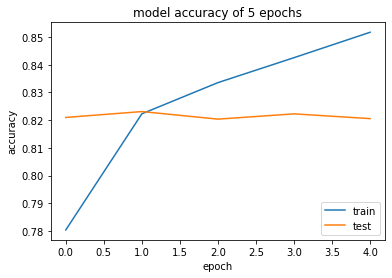

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy of 5 epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

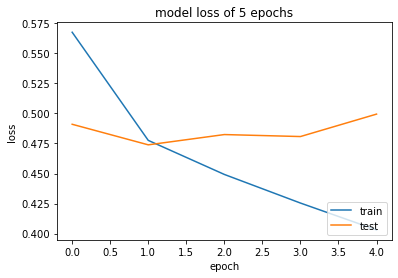

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss of 5 epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [71]:
pred_y=[]
for pred in y_pred:
    if np.argmax(pred)==2:
        pred_y.append(1)
    elif np.argmax(pred)==1:
           pred_y.append(0)
    else:
        pred_y.append(-1)

In [72]:
pred_y

[0,
 -1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 -1,
 1,
 -1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 0,
 0,
 -1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 0,
 0,
 -1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 -1,
 0,
 -1,
 0,
 0,
 -1,
 1,
 -1,
 0,
 0,
 0,
 0,
 -1,
 1,
 0,
 1,
 -1,
 1,
 -1,
 -1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 -1,
 1,
 0,
 0,
 1,
 1,
 1,
 -1,
 0,
 0,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 0,
 1,
 -1,
 0,
 1,
 -1,
 1,
 -1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 -1,
 0,
 1,
 -1,
 0,
 0,
 0,
 1,
 1,
 0,
 -1,
 -1,
 1,
 1,
 -1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 -1,
 0,
 0,
 1,
 0,
 0,
 1,
 -1,
 1,
 1,
 -1,
 0,
 0,
 0,
 -1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 -1,
 1,
 0,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 0,
 -1,
 1,
 0,
 1,
 1,
 0,
 1,
 -1,
 1,
 0,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 0,
 0,
 1,


In [73]:
y_test=[]
for it in ytest:
    if np.argmax(it)==2:
        y_test.append(1)
       # print("pos")
    elif np.argmax(it)==1:
            y_test.append(0)
            #print("ne")
    else:
        y_test.append(-1)
       #print("neg")

In [75]:
y_test

[1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 0,
 -1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 -1,
 0,
 0,
 -1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 -1,
 1,
 -1,
 0,
 0,
 -1,
 1,
 -1,
 0,
 0,
 0,
 0,
 -1,
 1,
 0,
 1,
 -1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 -1,
 0,
 1,
 1,
 1,
 -1,
 0,
 0,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 0,
 1,
 -1,
 0,
 1,
 -1,
 1,
 -1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 -1,
 0,
 0,
 1,
 0,
 0,
 1,
 -1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 -1,
 1,
 1,
 0,
 0,
 -1,
 0,
 1,
 1,
 0,
 0,
 -1,
 1,
 0,
 0,
 1,
 0,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 0,
 -1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 0,
 0,
 -1

In [113]:
ytest

array([[ 1,  1,  1],
       [ 0,  0,  0],
       [ 0,  0,  0],
       ...,
       [-1, -1, -1],
       [ 0,  0,  0],
       [ 1,  1,  1]])

In [86]:
cm= confusion_matrix(y_test, pred_y)  

In [97]:
cm

array([[ 5348,   601,  1108],
       [  524,  9233,  1328],
       [ 1028,  1346, 12078]], dtype=int64)

In [99]:
unique_labels(y_test)

array([-1,  0,  1])

In [110]:
def plot1(ytrue, ypred):
    labels= unique_labels(y_test)
    column= ['Negative','Neutral','Positive']
    indices=['Negative','Neutral','Positive']
    table= pd.DataFrame(confusion_matrix(ytrue,ypred),columns= column, 
                        index= indices)
    return table

In [111]:
plot1(y_test, pred_y)

,Negative,Neutral,Positive
Negative,5348,601,1108
Neutral,524,9233,1328
Positive,1028,1346,12078


In [112]:
def plot2(ytrue, ypred):
    labels= unique_labels(y_test)
    column= ['Negative','Neutral','Positive']
    indices=['Negative','Neutral','Positive']
    table= pd.DataFrame(confusion_matrix(ytrue,ypred),columns= column, 
                        index= indices)
    return sns.heatmap(table,annot= True, fmt='d')


Text(0.5, 1.0, 'Confusion Matrix with labels\n\n')

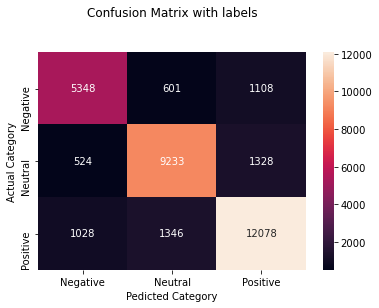

In [113]:
pl= plot2(y_test,pred_y)
pl.set_xlabel('Pedicted Category')
pl.set_ylabel('Actual Category')
pl.set_title('Confusion Matrix with labels\n\n')

In [118]:
def plot3(ytrue, ypred):
    labels= unique_labels(y_test)
    column= ['Negative','Neutral','Positive']
    indices=['Negative','Neutral','Positive']
    cm= confusion_matrix(ytrue,ypred)
    table= pd.DataFrame(cm/np.sum(cm),columns= column, 
                        index= indices)
    return sns.heatmap(table,annot= True, fmt='.2%')

Text(0.5, 1.0, 'Confusion Matrix for percentages with labels\n\n')

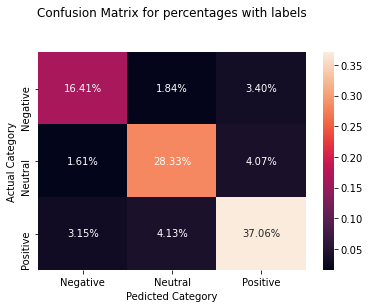

In [120]:
pl= plot3(y_test,pred_y)
pl.set_xlabel('Pedicted Category')
pl.set_ylabel('Actual Category')
pl.set_title('Confusion Matrix for percentages with labels\n\n')

In [77]:
print(classification_report(y_test,pred_y, labels=[1,0,-1]))

              precision    recall  f1-score   support

           1       0.83      0.84      0.83     14452
           0       0.83      0.83      0.83     11085
          -1       0.78      0.76      0.77      7057

    accuracy                           0.82     32594
   macro avg       0.81      0.81      0.81     32594
weighted avg       0.82      0.82      0.82     32594



In [78]:
print("%.2f" % round(precision_score(y_test,pred_y, average='weighted'),2))


0.82


In [79]:
print("%.2f" % round(recall_score(y_test,pred_y, average='weighted'),2))

0.82


In [80]:
print("%.2f" % round(f1_score(y_test,pred_y, average='weighted'),2))

0.82


# Testing Data

In [43]:
df4= pd.read_csv('C:\\Users\\ARUNIMA DAS\\Desktop\\pythonP\\Reddit_Data.csv')

In [44]:
word=list(df4.word)

In [45]:
max_words= 3000
max_len= 50
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(word)
sequences = tokenizer.texts_to_sequences(word)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...   13 1320  939]
 [ 156  615   83 ...    2 1028 1151]
 [   0    0    0 ...    8 1473  473]
 ...
 [   0    0    0 ... 1541 1303  862]
 [   0    0    0 ...    0 1289  315]
 [   0    0    0 ...   31    4  618]]


In [46]:
tweets.shape

(37149, 50)

In [47]:
embedding_layer = Embedding(3000, 256)

In [48]:
y= list(df4.category)
#y= np.array(y)
for i in range(len(y)):
    if(y[i]==-1):
        y[i]= [1,0,0]
    elif(y[i]==0):
        y[i]= [0,1,0]
    else:
        y[i]= [0,0,1]

In [49]:
y= np.array(y)

In [50]:
x1test= tweets

In [51]:
y1test= y

In [52]:
acc = model1.predict(x1test)

In [53]:
prediction=[]
for predc in acc:
    if np.argmax(predc)==2:
        prediction.append(1)
    elif np.argmax(predc)==1:
            prediction.append(0)
    else:
          prediction.append(-1)

In [46]:
len(prediction)

37149

In [54]:
cat= list(df4.category)

# Comparing Realing labels with predicted labels

In [55]:
real_pos=0
real_nau=0
real_nev=0
for i in cat:
    if(i==1):
        real_pos+=1
    elif(i==0):
        real_nau+=1
    else:
        real_nev+=1

In [56]:
pos=0
nau=0
nev=0
for predc in acc:
    if np.argmax(predc)==2:
        pos+=1
    elif np.argmax(predc)==1:
        nau+=1
    else:
        nev+=1

In [57]:
print('Number of predicted positive value',pos)
print('Real positive value',real_pos)

Number of predicted positive value 14390
Real positive value 15830


In [58]:
print('Number of predicted nautral value',nau)
print('Real nautral value',real_nau)

Number of predicted nautral value 16814
Real nautral value 13042


In [59]:
print('Number of predicted negative value',nev)
print('Real negative value',real_nev)

Number of predicted negative value 5945
Real negative value 8277


In [60]:
cm = confusion_matrix(cat, prediction)

In [61]:
cm

array([[1530, 2666, 4081],
       [1269, 8897, 2876],
       [3146, 5251, 7433]], dtype=int64)

In [62]:
print("%.2f" % round(precision_score(prediction,cat, average='weighted'),2))


0.52


In [63]:
print("%.2f" % round(recall_score(prediction, cat, average='weighted'),2))

0.48


In [64]:
print("%.2f" % round(f1_score(prediction,cat, average='weighted'),2))

0.49


In [65]:
print("%.2f" % round(accuracy_score(prediction,cat),2))

0.48


In [66]:
print(classification_report(cat,prediction, labels=[1,0,-1]))

              precision    recall  f1-score   support

           1       0.52      0.47      0.49     15830
           0       0.53      0.68      0.60     13042
          -1       0.26      0.18      0.22      8277

    accuracy                           0.48     37149
   macro avg       0.43      0.45      0.43     37149
weighted avg       0.46      0.48      0.47     37149



In [62]:
df4['Prediction']= prediction

In [63]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37149 entries, 0 to 37148
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37149 non-null  int64 
 2   word           37149 non-null  object
 3   Prediction     37149 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.1+ MB


In [64]:
df4.to_csv('testing_data.csv', index= False)

In [37]:
df5=  pd.read_csv('C:\\Users\\ARUNIMA DAS\\Desktop\\pythonP\\imp_final_data.csv')

In [38]:
word= list(df5.nostop)

In [62]:
max(word)

"['тhe', 'children', 'room', 'open', 'close', 'children', 'play', 'floor', 'hallway', 'patron', 'help', 'cryptocurr', 'buy', 'nft', 'grow', 'strong', 'consid', 'donat', 'crypto', 'help', 'nft', 'helpukrain', 'stopputin', 'standwithukrain']"

In [40]:
min(word)

"['aap', 'urg', 'govt', 'overrid', 'right', 'punjab', 'govt', 'chandigarh', 'admn', 'sunni', 'russianarmi', 'noflyzoneua']"

In [41]:
max_words= 5000
max_len= 35
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(word)
sequences = tokenizer.texts_to_sequences(word)
texts = pad_sequences(sequences, maxlen=max_len)
print(texts)

[[  0   0   0 ... 993   4   7]
 [  0   0   0 ...  60  14   8]
 [  0   0   0 ...  92   7 148]
 ...
 [  0   0   0 ...  10  11   1]
 [  0   0   0 ...   0 248  10]
 [  0   0   0 ...  61  33   2]]


In [42]:
pred = model1.predict(texts)

In [66]:
pred

array([[1.17778340e-02, 9.57678676e-01, 3.05435136e-02],
       [9.22176187e-05, 1.29434731e-04, 9.99778330e-01],
       [1.59244820e-01, 3.27628627e-02, 8.07992339e-01],
       ...,
       [1.12657346e-01, 8.48188162e-01, 3.91545109e-02],
       [7.99615588e-03, 9.46560740e-01, 4.54430357e-02],
       [9.78852808e-01, 7.39048049e-03, 1.37567576e-02]], dtype=float32)

In [43]:
prediction=[]
for p in pred:
    if np.argmax(p)==2:
        prediction.append(1)
    elif np.argmax(p)==1:
            prediction.append(0)
    else:
          prediction.append(-1)

In [44]:
positive=0
neutral=0
negative=0
for p in prediction:
    if(p==1):
        positive+=1
    elif(p==-1):
        negative+=1
    else:
        neutral+=1

In [48]:
print(positive)

10531


In [49]:
print(negative)

5040


In [50]:
print(neutral)

8368


In [84]:
df5['Label']= prediction 

In [51]:
df5.shape

(23939, 12)

In [90]:
df5.text[2]

'tears. take a handful of minutes and watch. russianukrainianwar slavaukraini '

In [91]:
df5.to_csv('imp_final_data.csv', index= False)

In [92]:
df5.head(10)

,tweet_id,user_name,user_location,date,text,hashtags,Sentence,word,nostop,Label
0,1.504560e+18,PMESII,Antarctica,2022-03-17 20:42:42+00:00,russian occupants in the homes of ukrainian c...,"['Russian', 'Ukrainian', 'UkraineRussiaWar', '...",[' russian occupants in the homes of ukrainian...,"['russian', 'occup', 'home', 'ukrainian', 'civ...","['russian', 'occup', 'home', 'ukrainian', 'civ...",1
1,1.504560e+18,RED Python (EngD PhD),United States,2022-03-17 20:42:28+00:00,the worst leadership of a country ever ukraine...,"['UkraineRussiaWar', 'UkraineUnderAttack', 'Uk...",['the worst leadership of a country ever ukrai...,"['bad', 'leadership', 'countri', 'ukrainerussi...","['bad', 'leadership', 'countri', 'ukrainerussi...",1
2,1.504560e+18,JimOnLight,"Dallas, TX",2022-03-17 20:42:27+00:00,tears. take a handful of minutes and watch. ru...,"['RussianUkrainianWar', 'SlavaUkraini']","['tears.', 'take a handful of minutes and watc...","['tear', 'hand', 'minut', 'watch', 'russianukr...","['tear', 'hand', 'minut', 'watch', 'russianukr...",0
3,1.504560e+18,Peter Brandt,"Paombong, Central Luzon",2022-03-17 20:41:51+00:00,putin allegedly arrests his own military chief...,"['Ukraine', 'UkraineWar', 'UkraineUnderAttack'...",['putin allegedly arrests his own military chi...,"['putin', 'allegedli', 'arrest', 'militari', '...","['putin', 'allegedli', 'arrest', 'militari', '...",-1
4,1.504560e+18,World news,NaN,2022-03-17 20:41:37+00:00,scenes of destruction left by the russian army...,"['UkraineRussiaWar', 'Mariupol', 'UkraineRussi...",['scenes of destruction left by the russian ar...,"['scene', 'destruct', 'left', 'russian', 'armi...","['scene', 'destruct', 'left', 'russian', 'armi...",0
5,1.504560e+18,Angela Veitch,"Ottawa, Ontario",2022-03-17 20:41:37+00:00,an authentic heartfelt plea to the russian peo...,"['RussianUkrainianWar', 'truth', 'StopTheInvas...",['an authentic heartfelt plea to the russian p...,"['authent', 'heartfelt', 'plea', 'russian', 'p...","['authent', 'heartfelt', 'plea', 'russian', 'p...",-1
6,1.504560e+18,Asiana Times,India,2022-03-17 20:41:36+00:00,explained: analysis of putin’s nuclear threat....,"['UkraineKrieg', 'RussianUkrainianWar', 'Khark...",['explained: analysis of putin’s nuclear threa...,"['explain', 'analysi', 'putin', 'nuclear', 'ar...","['explain', 'analysi', 'putin', 'nuclear', 'ar...",0
7,1.504560e+18,Nataliia,NaN,2022-03-17 20:41:29+00:00,stoprussia stopputin warinukraine russianukra...,"['StopRussia', 'StopPutin', 'WARINUKRAINE', 'R...",[' stoprussia stopputin warinukraine russianuk...,"['stoprussia', 'stopputin', 'warinukrain', 'ru...","['stoprussia', 'stopputin', 'warinukrain', 'ru...",1
8,1.504560e+18,CitizenScouse,"Liverpool, United Kingdom",2022-03-17 20:41:10+00:00,the media desperately trying to get other coun...,"['Mariupol', 'UkraineRussiaWar', 'RussianUkrai...",['the media desperately trying to get other co...,"['media', 'desper', 'tri', 'countri', 'involv'...","['media', 'desper', 'tri', 'countri', 'involv'...",1
9,1.504560e+18,emmm,Planet Earth,2022-03-17 20:41:08+00:00,russia russianukrainianwar russiaukraineconfl...,"['Russia', 'RussianUkrainianWar', 'RussiaUkrai...",[' russia russianukrainianwar russiaukrainecon...,"['russia', 'russianukrainianwar', 'russiaukrai...","['russia', 'russianukrainianwar', 'russiaukrai...",1


In [54]:
df6= pd.read_csv('C:\\Users\\ARUNIMA DAS\\Desktop\\pythonP\\new_imp_data.csv')

In [56]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24146 entries, 0 to 24145
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_id       24146 non-null  int64 
 1   user_name      24145 non-null  object
 2   user_location  15532 non-null  object
 3   date           24146 non-null  object
 4   text           24146 non-null  object
 5   hashtags       24145 non-null  object
 6   word           24146 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB


In [60]:
texts= list(df6.word)

In [69]:
max_words= 5000
max_len= 35
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
text = pad_sequences(sequences, maxlen=max_len)
print(text)

[[   0    0    0 ...  142    1    7]
 [   0    0    0 ...    3    2    7]
 [   0    0    0 ...  911 2934    7]
 ...
 [   0    0    0 ...  134  351  974]
 [   0    0    0 ...  173 4052    2]
 [   0    0    0 ...  144   30    1]]


In [71]:
pred_new = model1.predict(text)

In [72]:
prediction=[]
for p in pred_new:
    if np.argmax(p)==2:
        prediction.append(1)
    elif np.argmax(p)==1:
            prediction.append(0)
    else:
          prediction.append(-1)

In [73]:
positive=0
neutral=0
negative=0
for p in prediction:
    if(p==1):
        positive+=1
    elif(p==-1):
        negative+=1
    else:
        neutral+=1

In [74]:
print(positive)

10793


In [75]:
print(negative)

4887


In [76]:
print(neutral)

8466


In [77]:
df6['Label']= prediction 

In [78]:
df6.to_csv('new_imp_data.csv', index= False)

In [79]:
df7= pd.read_csv('E:\\pythonP\\new_imp_data.csv')

In [84]:
data= df7[['text','Label']]

In [85]:
data.head(10)

,text,Label
0,more than 600 brands have withdrawn from russi...,1
1,this is funny 😄 ukraine armukrainenow russiana...,-1
2,"after missile strikes on odesa this evening, o...",-1
3,روسيا أوكرانيا updated special operation map ...,0
4,very close fighting between russian and ukrain...,0
5,breaking now - new video - american fighter i...,1
6,"russianukrainianwar update hosted by , where ...",-1
7,"📌 cia director william burns: ""in the long ter...",1
8,i wish i could write long text regarding all t...,1
9,america’s pres. biden signs 'ukraine democracy...,-1
